Data Description & Context: 

Parkinson’s Disease (PD) is a degenerative neurological disorder marked by 
decreased dopamine levels in the brain. It manifests itself through a deterioration 
of movement, including the presence of tremors and stiffness. There is commonly 
a marked effect on speech, including dysarthria (difficulty articulating sounds), 
hypophonia (lowered volume), and monotone (reduced pitch range). Additionally, 
cognitive impairments and changes in mood can occur, and risk of dementia is 
increased. 

Traditional diagnosis of Parkinson’s Disease involves a clinician taking a 
neurological history of the patient and observing motor skills in various situations. 
Since there is no definitive laboratory test to diagnose PD, diagnosis is often 
difficult, particularly in the early stages when motor effects are not yet severe. 
Monitoring progression of the disease over time requires repeated clinic visits by 
the patient. An effective screening process, particularly one that doesn’t require a 
clinic visit, would be beneficial. Since PD patients exhibit characteristic vocal 
features, voice recordings are a useful and non-invasive tool for diagnosis. If 
machine learning algorithms could be applied to a voice recording dataset to 
accurately diagnosis PD, this would be an effective screening step prior to an 
appointment with a clinician.

Domain: Medicine 

Attribute Information: 

name - ASCII subject name and recording number 

MDVP:Fo(Hz) - Average vocal fundamental frequency 

MDVP:Fhi(Hz) - Maximum vocal fundamental frequency 

MDVP:Flo(Hz) - Minimum vocal fundamental frequency 

MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP - Several 

measures of variation in fundamental frequency 

MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,Shimmer:DDA - Several measures of variation in amplitude 

NHR,HNR - Two measures of ratio of noise to tonal components in the voice 

status - Health status of the subject (one) - Parkinson's, (zero) - healthy 

RPDE,D2 - Two nonlinear dynamical complexity measures 

DFA - Signal fractal scaling exponent 

spread1,spread2,PPE - Three nonlinear measures of fundamental frequency 
variation 9. car name: string (unique for each instance) 

Learning Outcomes: 

● Exploratory Data Analysis 
● Supervised Learning 
● Ensemble Learning 

Objective:  Goal is to classify the patients into the respective labels using the attributes from 
their voice recordings.

Steps and tasks: 

1. Load the dataset 
2. It is always a good practice to eye-ball raw data to get a feel of the data in 
terms of number of records, structure of the file, number of attributes, types of attributes and a general idea of likely challenges in the dataset. Mention a few comments in this regard 
3. Using univariate & bivariate analysis to check the individual attributes for 
their basic statistics such as central values, spread, tails, relationships 
between variables etc. mention your observations 
4. Split the dataset into training and test set in the ratio of 70:30 
(Training:Test) 
5. Prepare the data for training - Scale the data if necessary, get rid of missing 
values (if any) etc
6. Train at least 3 standard classification algorithms - Logistic Regression, 
Naive Bayes’, SVM, k-NN etc, and note down their accuracies on the test 
data 
7. Train a meta-classifier and note the accuracy on test data 
8. Train at least one standard Ensemble model - Random forest, Bagging, 
Boosting etc, and note the accuracy 
9. Compare all the models (minimum 5) and pick the best one among them 

### Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams.update({'figure.max_open_warning': 0})
import seaborn as sns
sns.set(color_codes=True)
import scipy.stats as sci
from sklearn import model_selection
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from scipy.stats import zscore
from sklearn import datasets

iris = datasets.load_iris()
x, y = iris.data[:, 1:3], iris.target
num_bins = 10

### 1. Load the dataset.

In [2]:
pd_data=pd.read_csv('Data-Parkinsons.csv')

### 2. It is always a good practice to eye-ball raw data to get a feel of the data in terms of number of records, structure of the file, number of attributes, types of attributes and a general idea of likely challenges in the dataset. Mention a few comments in this regard (5 points) 

In [3]:
pd_data.describe().T

,count,mean,std,min,25%,50%,75%,max
MDVP:Fo(Hz),195.0,154.228641,41.390065,88.333000,117.572000,148.790000,182.769000,260.105000
MDVP:Fhi(Hz),195.0,197.104918,91.491548,102.145000,134.862500,175.829000,224.205500,592.030000
MDVP:Flo(Hz),195.0,116.324631,43.521413,65.476000,84.291000,104.315000,140.018500,239.170000
MDVP:Jitter(%),195.0,0.006220,0.004848,0.001680,0.003460,0.004940,0.007365,0.033160
MDVP:Jitter(Abs),195.0,0.000044,0.000035,0.000007,0.000020,0.000030,0.000060,0.000260
MDVP:RAP,195.0,0.003306,0.002968,0.000680,0.001660,0.002500,0.003835,0.021440
MDVP:PPQ,195.0,0.003446,0.002759,0.000920,0.001860,0.002690,0.003955,0.019580
Jitter:DDP,195.0,0.009920,0.008903,0.002040,0.004985,0.007490,0.011505,0.064330
MDVP:Shimmer,195.0,0.029709,0.018857,0.009540,0.016505,0.022970,0.037885,0.119080
MDVP:Shimmer(dB),195.0,0.282251,0.194877,0.085000,0.148500,0.221000,0.350000,1.302000


In [4]:
#rename columns to make it readable
pd_data.rename(columns = {'MDVP:Fo(Hz)':'MDVP_Fo', 
                          'MDVP:Fhi(Hz)':'MDVP_Fhi',
                          'MDVP:Flo(Hz)':'MDVP_Flo',
                          'MDVP:Jitter(%)':'MDVP_Jitter_Percentage',
                          'MDVP:Jitter(Abs)':'MDVP_Jitter_Abs',
                          'MDVP:RAP':'MDVP_RAP',
                          'MDVP:PPQ':'MDVP_PPQ',
                          'Jitter:DDP':'Jitter_DDP',
                          'MDVP:Shimmer':'MDVP_Shimmer',
                          'MDVP:Shimmer(dB)':'MDVP_Shimmer_dB',
                          'Shimmer:APQ3':'Shimmer_APQ3',
                          'Shimmer:APQ5':'Shimmer_APQ5',
                          'MDVP:APQ':'MDVP_APQ',
                          'Shimmer:DDA':'Shimmer_DDA'},inplace = True) 

In [5]:
#checking shape of data
pd_data.shape

(195, 24)

In [6]:
print('Insight: The dataset has 195 rows and 24 columns.')

Insight: The dataset has 195 rows and 24 columns.


In [7]:
#Datatype of each attribute
print(pd_data.dtypes);

name                       object
MDVP_Fo                   float64
MDVP_Fhi                  float64
MDVP_Flo                  float64
MDVP_Jitter_Percentage    float64
MDVP_Jitter_Abs           float64
MDVP_RAP                  float64
MDVP_PPQ                  float64
Jitter_DDP                float64
MDVP_Shimmer              float64
MDVP_Shimmer_dB           float64
Shimmer_APQ3              float64
Shimmer_APQ5              float64
MDVP_APQ                  float64
Shimmer_DDA               float64
NHR                       float64
HNR                       float64
status                      int64
RPDE                      float64
DFA                       float64
spread1                   float64
spread2                   float64
D2                        float64
PPE                       float64
dtype: object


### Insights on the column datatypes:


The below columns can be categorised into the below data types:
1. name-This column can be dropped. This is because, it only describes the data and cannot be used to perform any analysis.
2. MDVP_Fo, MDVP:Fhi(Hz), MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP - Continuous variables
3. MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,Shimmer:DDA - Continuous variables
4. NHR,HNR - Continuous variables
5. status - Categorical variable. This is our target variable.
6. RPDE,D2 - Continuous variables
7. DFA - Continuous variable
8. spread1,spread2,PPE - Non Linear continuous variables

In [8]:
#check for total number of parkinsons patients in the dataset
pd_data.status.value_counts()

1    147
0     48
Name: status, dtype: int64

In [9]:
print('Insights: We see that 147 patients out of 195 are parkinsons patients.')

Insights: We see that 147 patients out of 195 are parkinsons patients.


In [10]:
#check for missing values
pd_data.isna().apply(pd.value_counts)

,name,MDVP_Fo,MDVP_Fhi,MDVP_Flo,MDVP_Jitter_Percentage,MDVP_Jitter_Abs,MDVP_RAP,MDVP_PPQ,Jitter_DDP,MDVP_Shimmer,...,Shimmer_DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
False,195,195,195,195,195,195,195,195,195,195,...,195,195,195,195,195,195,195,195,195,195


In [11]:
print('Insights: We see that there are no missing values at all in the dataset.')

Insights: We see that there are no missing values at all in the dataset.


In [12]:
#dropping the name column since it is not much significant for data analysis.
pd_data = pd_data.drop('name',axis=1)

### 3. Using univariate & bivariate analysis to check the individual attributes for their basic statistics such as central values, spread, tails, relationships between variables etc. mention your observations

##### Univariate Analysis:

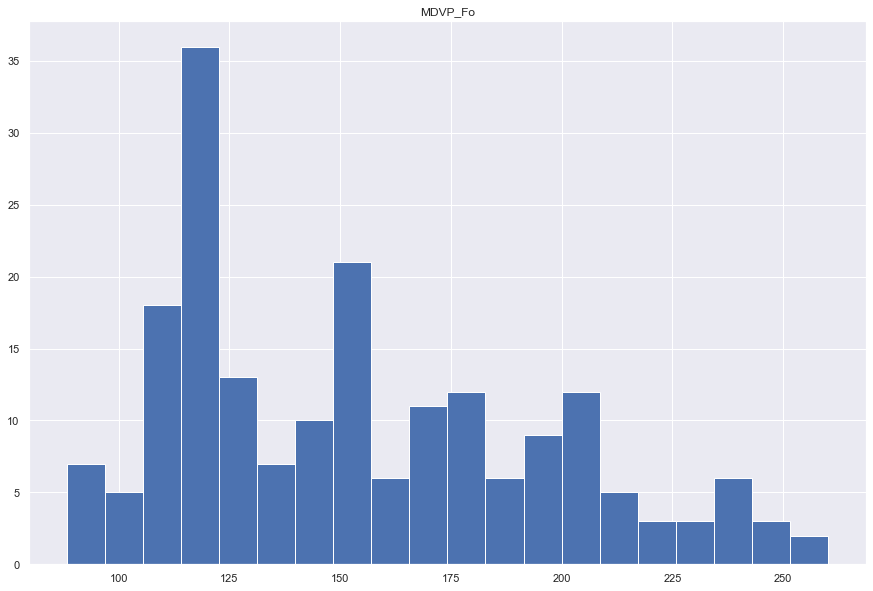

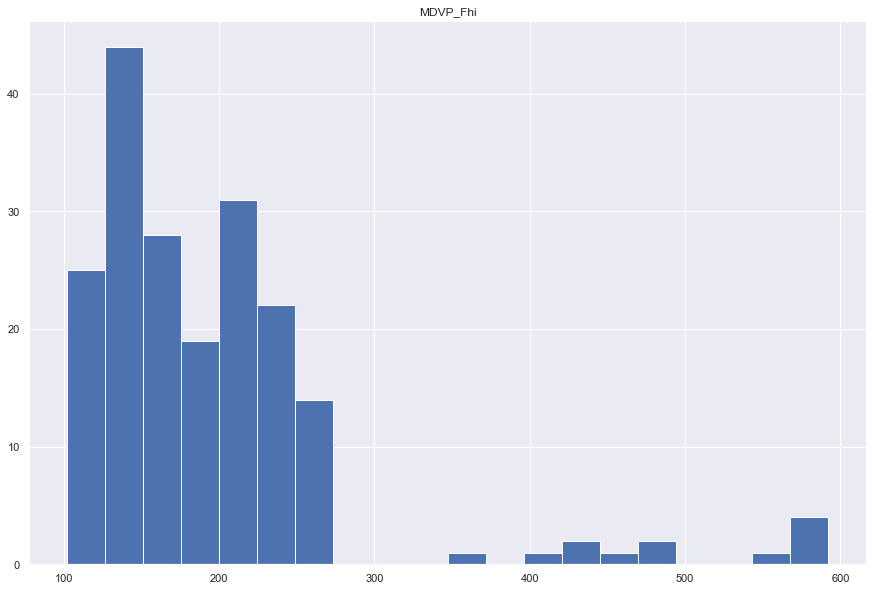

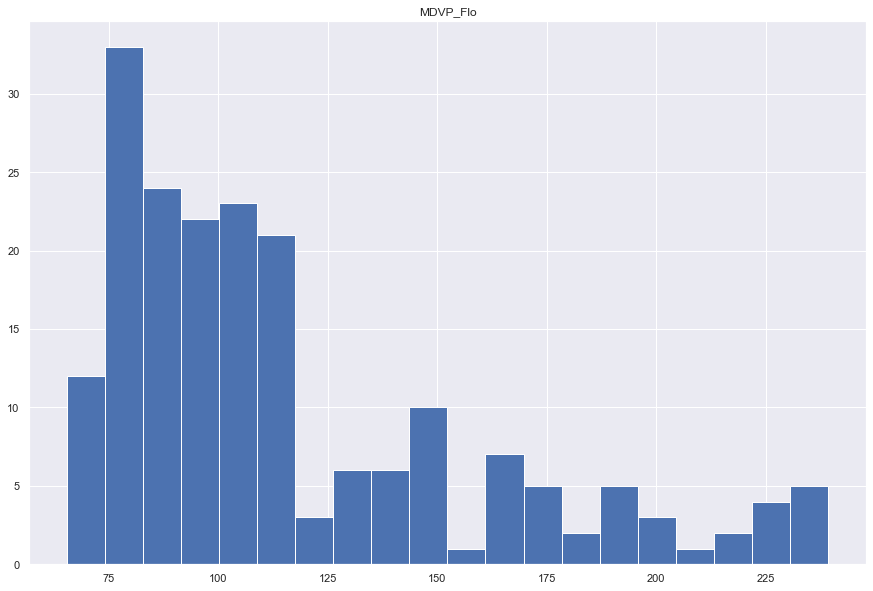

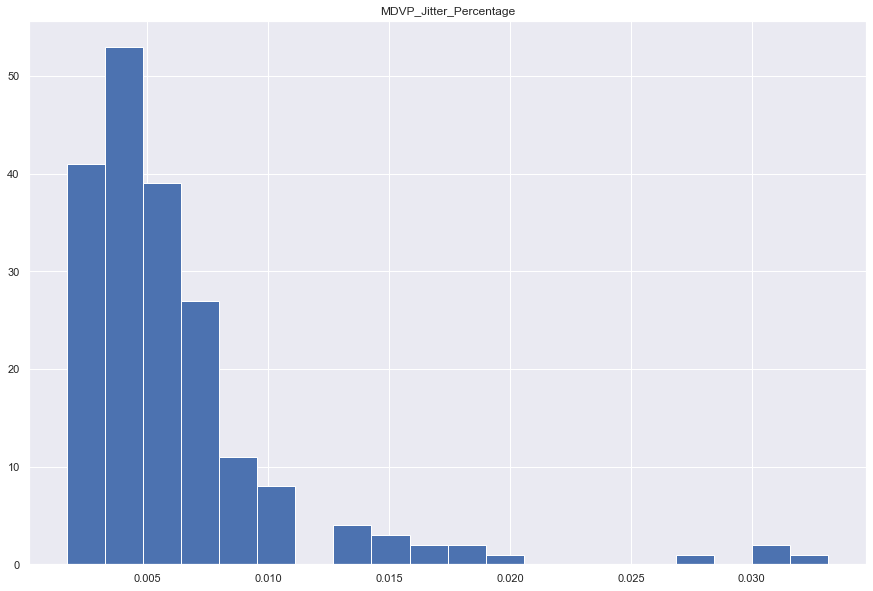

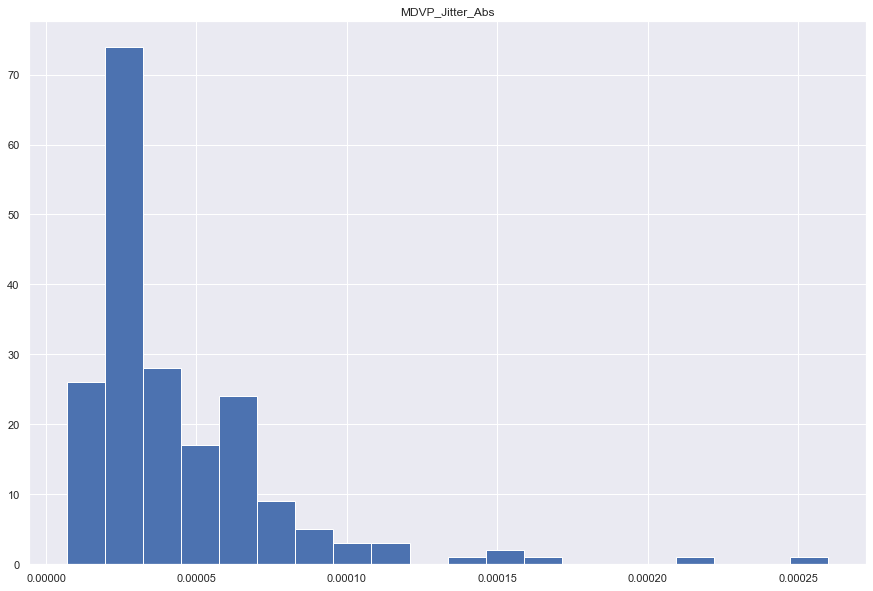

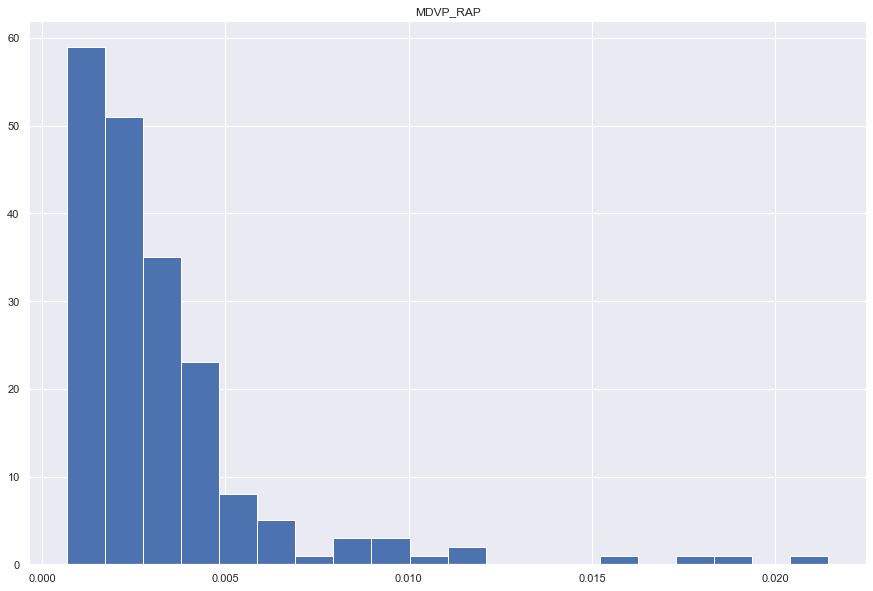

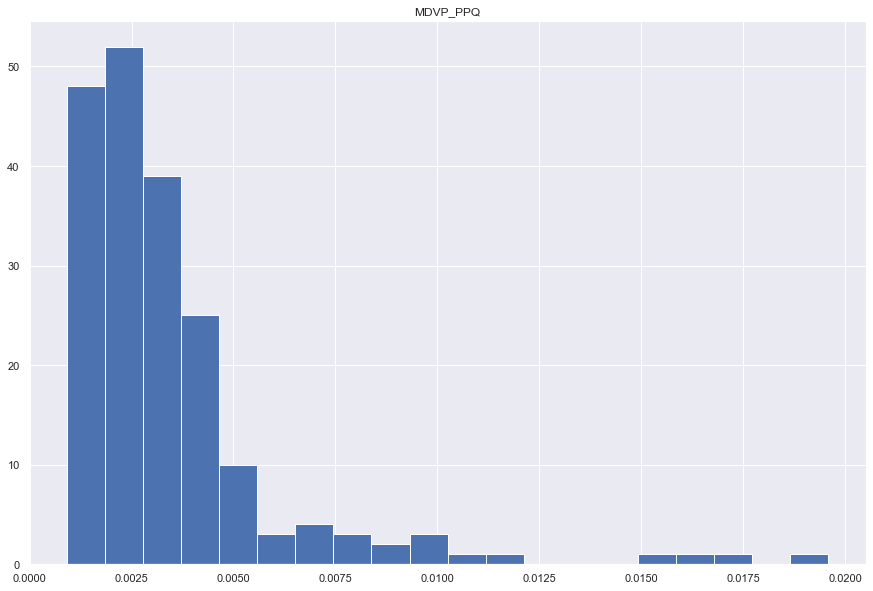

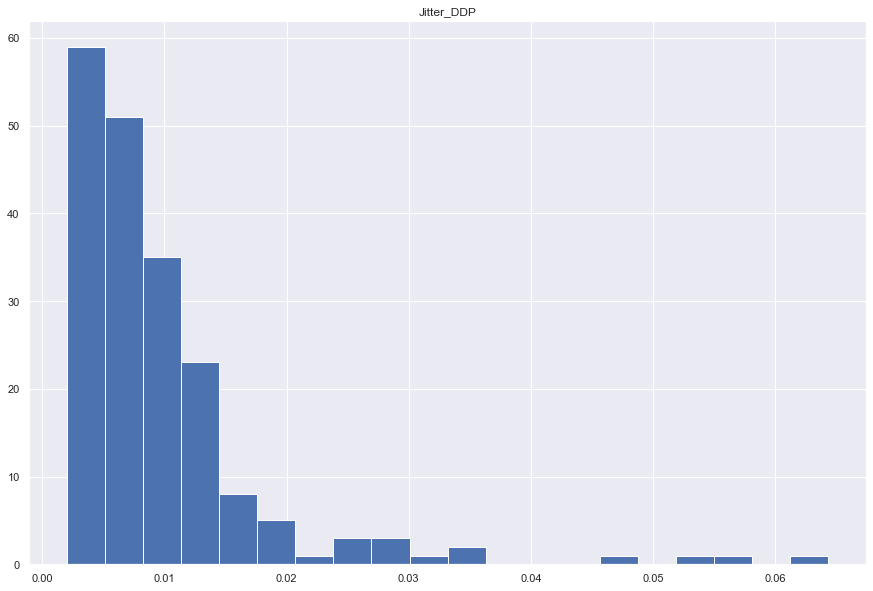

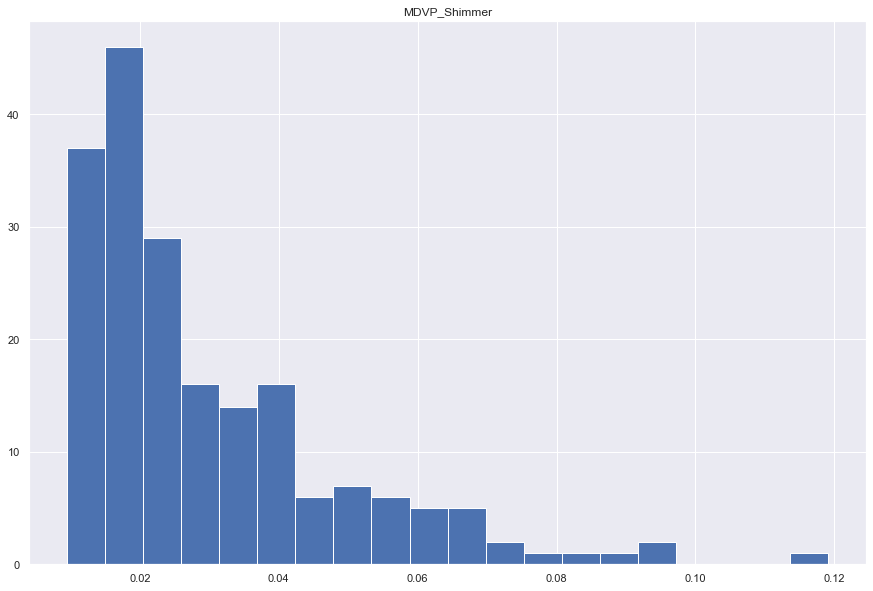

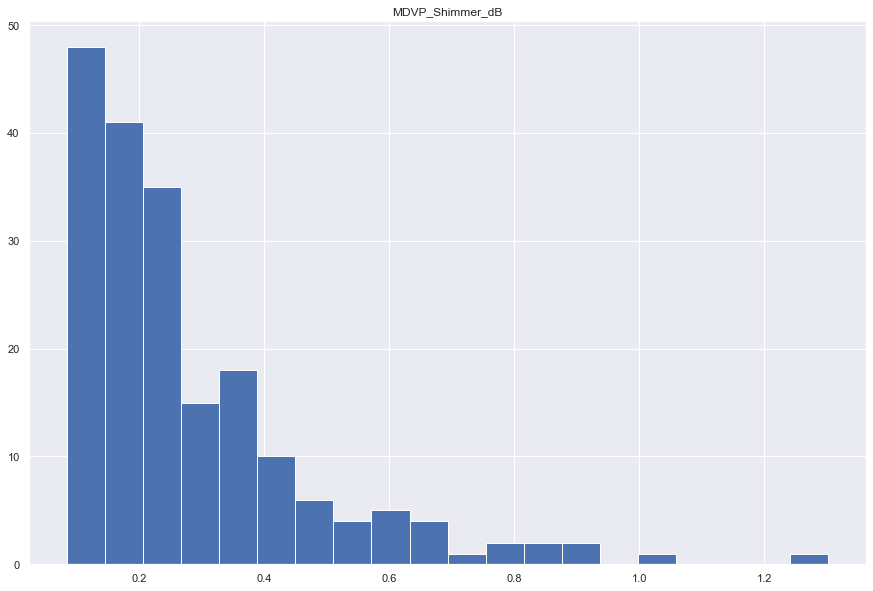

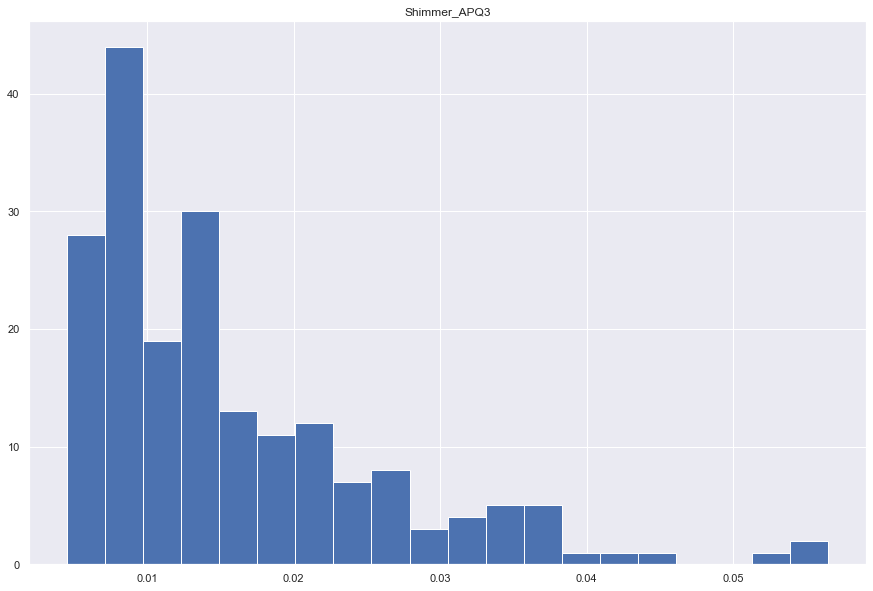

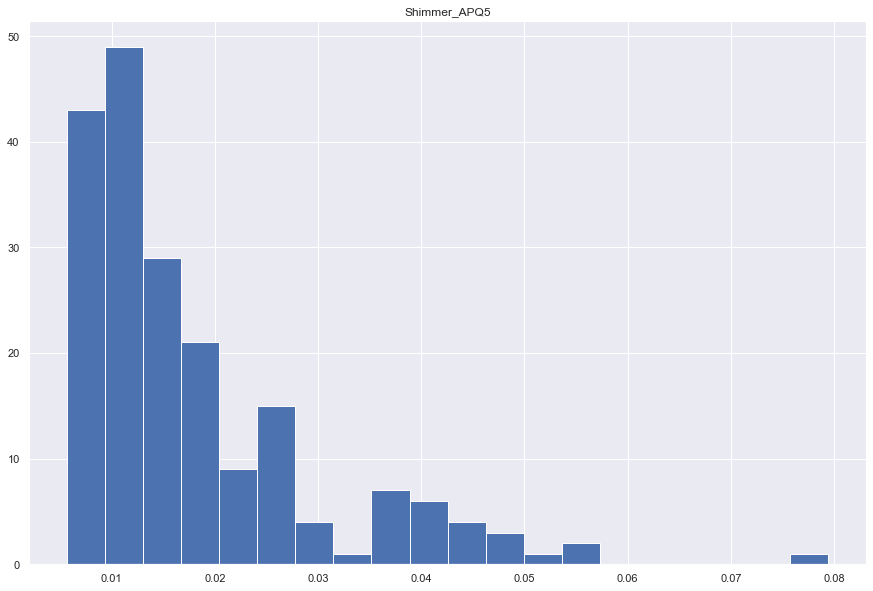

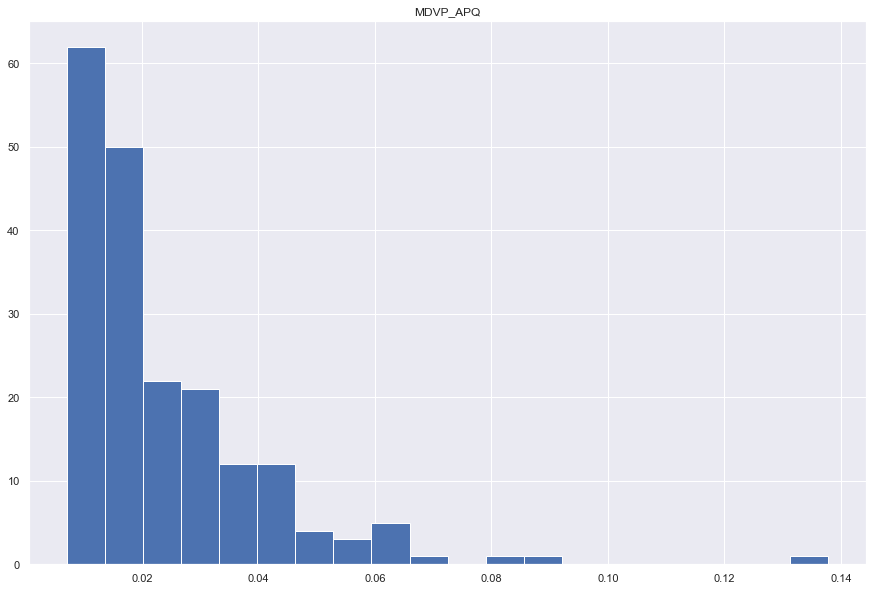

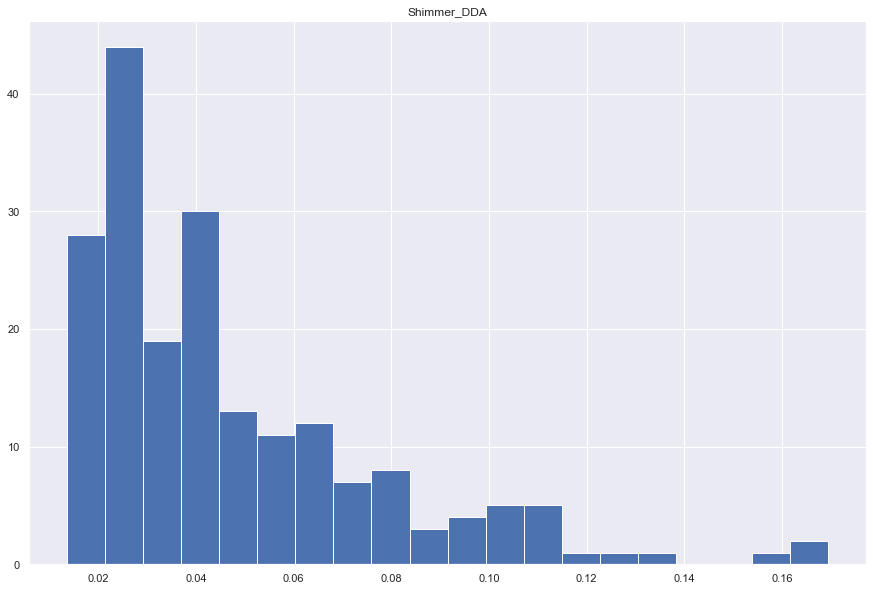

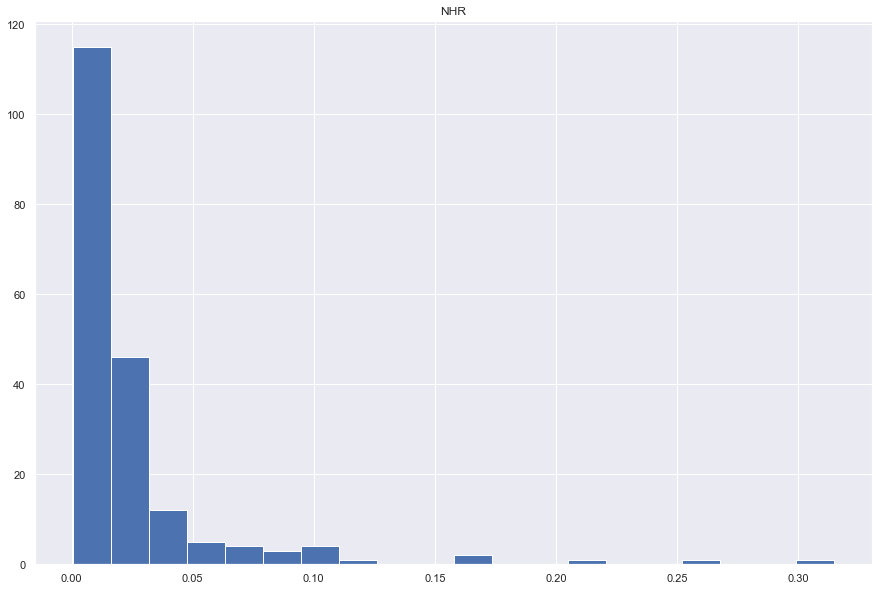

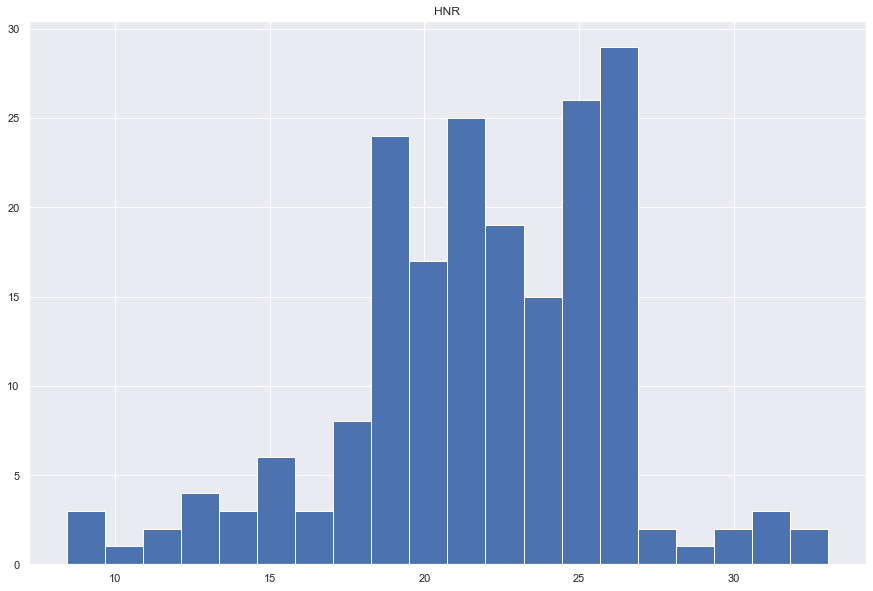

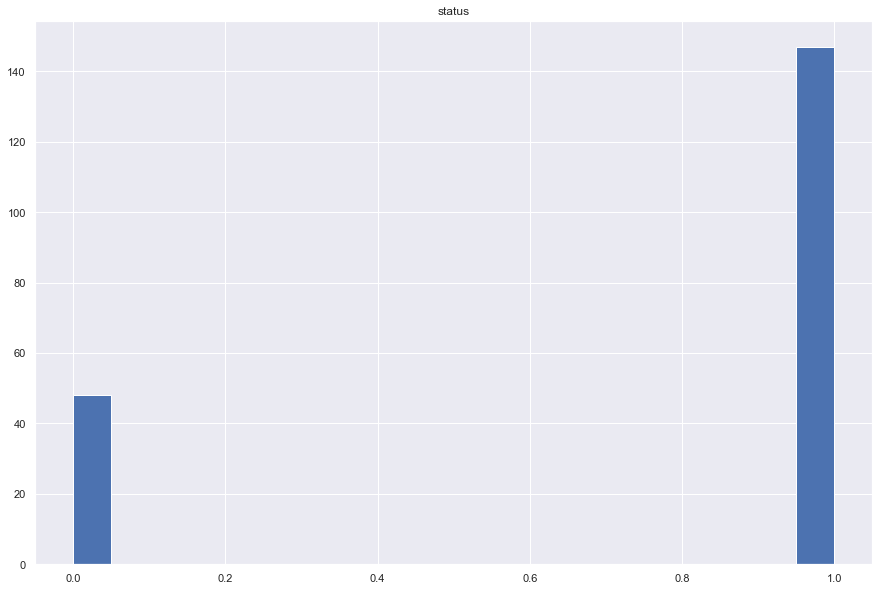

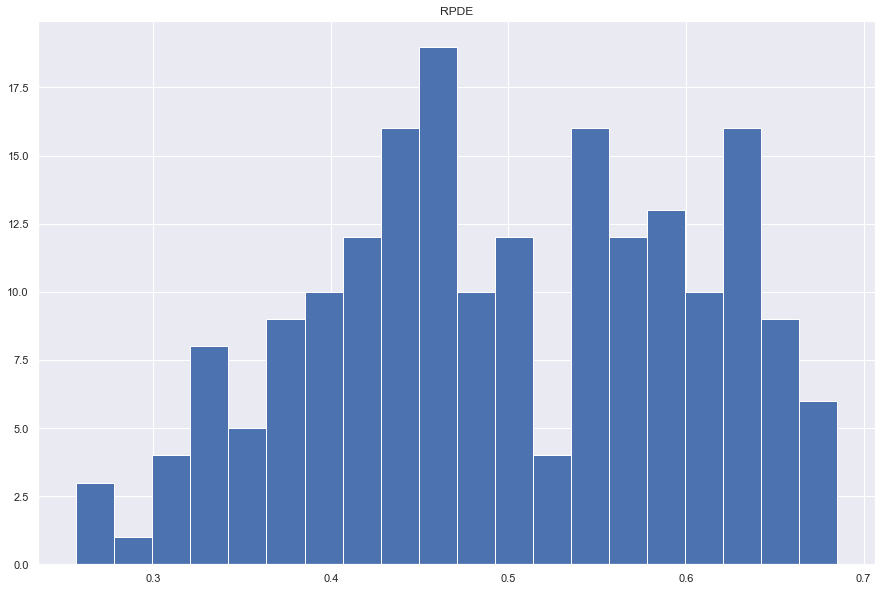

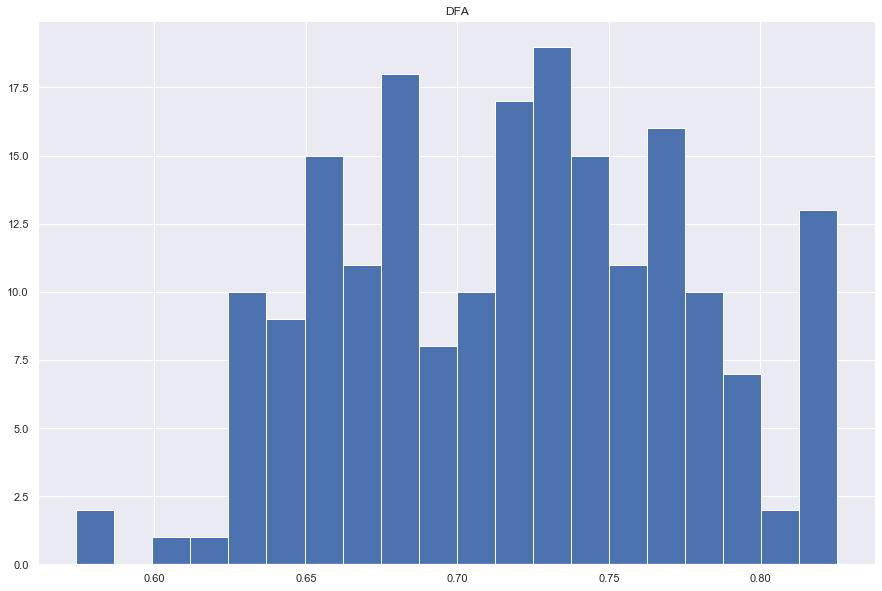

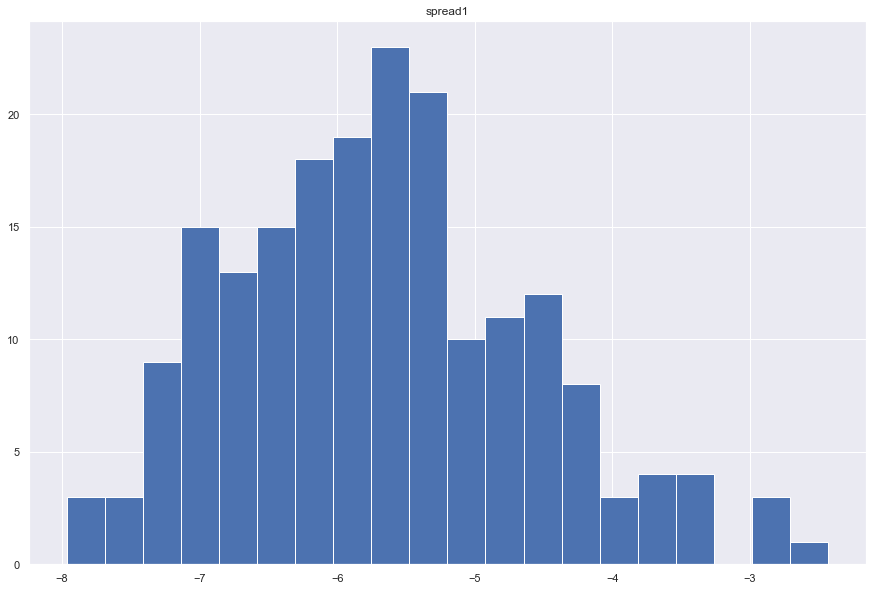

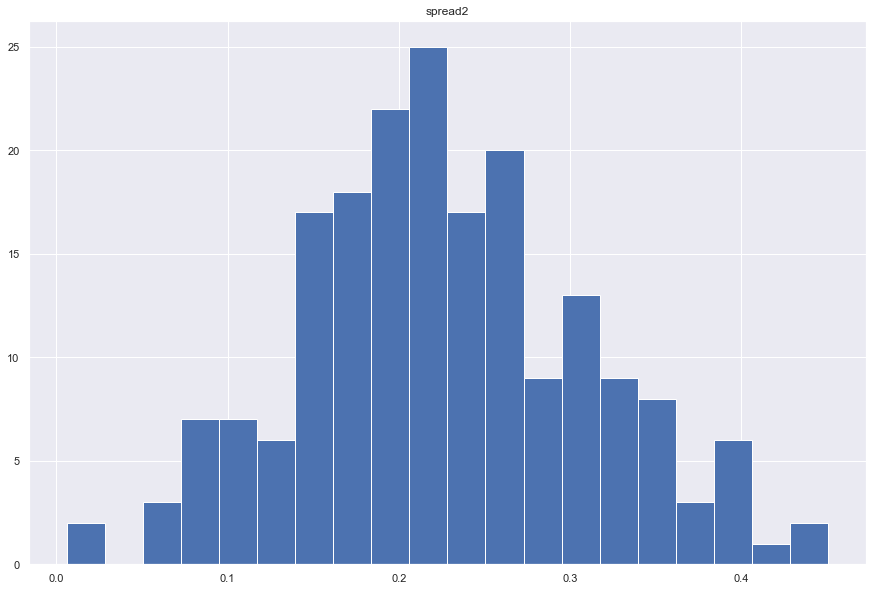

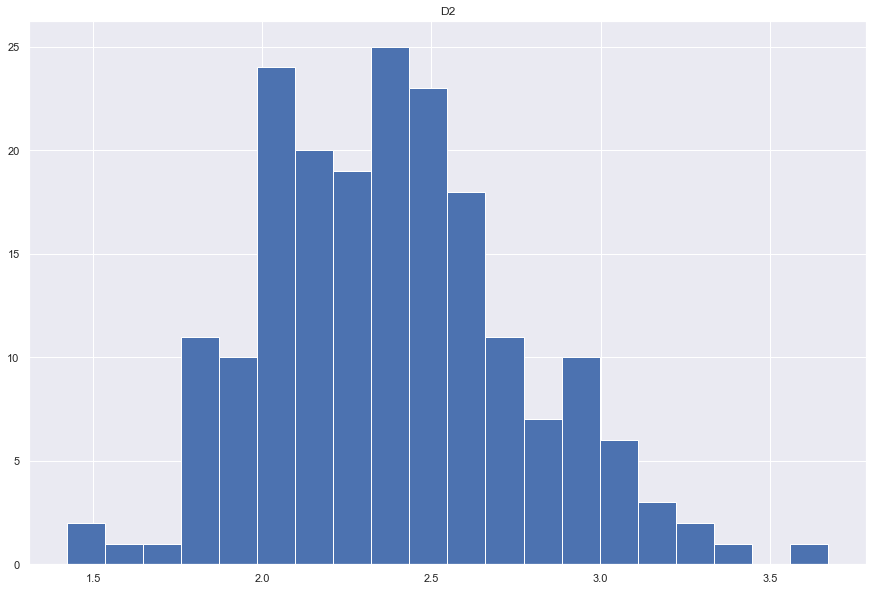

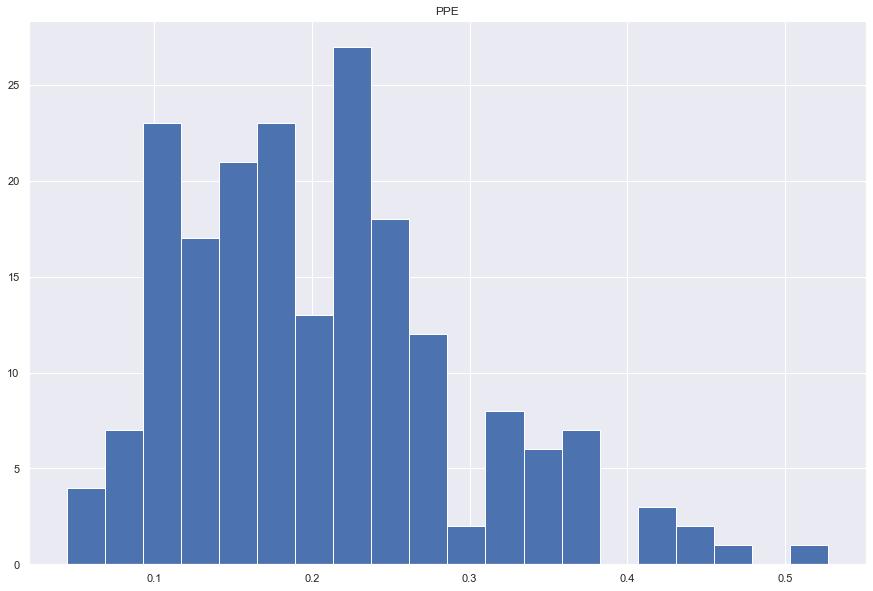

In [13]:
#creating histograms for each column of data to analyze the data distribution
for col in pd_data.columns:
    try:
        pd_data[col]=pd.to_numeric(pd_data[col])
        pd_data.hist(column=col,bins=20, figsize=(15, 10))
    except ValueError:
        print('This column can not be represented as a histogram')
            

### Insights about each column of the graphs above


1. MDVP_Fo - This distribution is almost normally distributed, which means that average vocal fundamental frequency of majority of patients are between 100-150 Hz with 120 Hz being the maximum for around 35 patients. Very few people can have a value as big as 250 Hz. The mean is much greater than the median in this case.

2. MDVP_FHi - From the graph we can clearly see that maximum vocal frequency of a majority of patients lie between 100-280 Hz.There are minimal patients with a max vocal frequency between 300-380 Hz and between 500-540Hz. A small number pf patients have this value nearing 600Hz. This distribution is clearly symmetric, with a few values towards the right.

3. MDVP_Flo - This distribution is clearly skewed towards the right, which means that mean is much greater than the median. Most of the patients' minimal vocal frequency lies between 75 to 120 Hz.

4. MDVP_Jitter_Percentage, MDVP_Jitter_Abs, MDVP_RAP, MDVP_PPQ and JItter_DDP - Similar to the earlier graphs, these columns are clearly right skewed heavily. 

5. MDVP_Shimmer,MDVP_Shimmer(dB),Shimmer_APQ3,Shimmer_APQ5,MDVP_APQ,Shimmer_DDA - These graphs also show a heavily right skewed distribution, which means that the variation in amplitude is very less in maximum number of patients of the dataset.

6. NHR - This distribution is rightly skewed. The maximum number pf patients have this ratio between 0 to 0.2.

7. HNR - HNR follows almost a normal distribution, with a very little skewness towards the left.The maximum value is a little more than 25.

8. Status - We see that most of the patients in this dataset have Parkinsons disease, 150 approcimately, whereas only 45 of them do not have this disease.

9. RPDE,D2 - These columns follow almost a normal distribution with very little/negligible skewness.

10. DFA - This column is also distributed symmetrically.

11. spread1,spread2,PPE - These columns follow normal distributions, with very little skewness towards the right for PPE.

##### Bivariate Analysis:

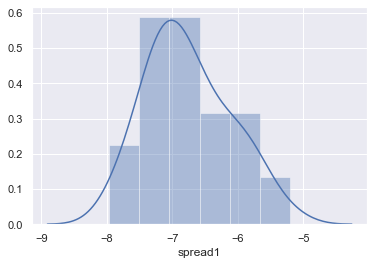

In [14]:
#MDVP_Fo, MDVP_Fi,MDVP_FLo vs Status
sns.distplot( pd_data[pd_data.status == 0]['spread1'])

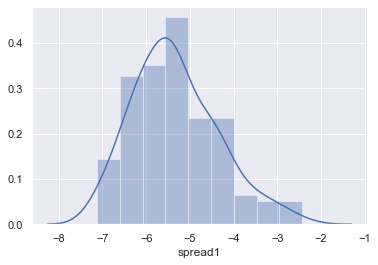

In [15]:
sns.distplot( pd_data[pd_data.status == 1]['spread1'])

In [16]:
print('Insights: We see that the spread 1 column is normally distributed between patients who have Parkinsons disease and those who do not have it.People who have spread1 between - 8.5 and -7.5 are more and they are normal. People whose spread1 is between -6.5 and -5 are having Parkinsons disease.')

Insights: We see that the spread 1 column is normally distributed between patients who have Parkinsons disease and those who do not have it.People who have spread1 between - 8.5 and -7.5 are more and they are normal. People whose spread1 is between -6.5 and -5 are having Parkinsons disease.


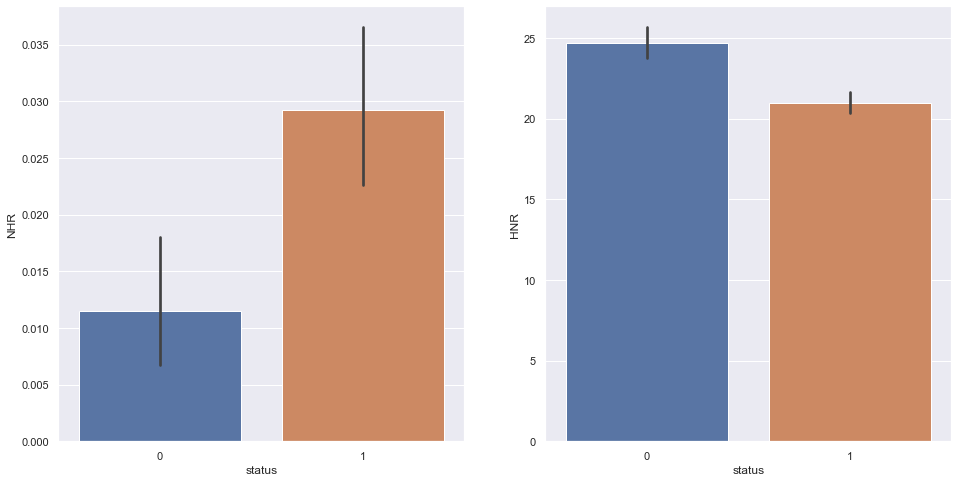

In [17]:
#relation between NHR, HNR and Status columns:
fig, ax = plt.subplots(1,2,figsize=(16,8))
sns.barplot(x='status',y='NHR',data=pd_data,ax=ax[0])
sns.barplot(x='status',y='HNR',data=pd_data,ax=ax[1])

In [18]:
print('Insights: From the above bar plots we see, patients who have Parkinsons disease have a higher NHR ratio compared to the ones who do not have it, However, the situation is exactly opposite in case of HNR ratio.')

Insights: From the above bar plots we see, patients who have Parkinsons disease have a higher NHR ratio compared to the ones who do not have it, However, the situation is exactly opposite in case of HNR ratio.


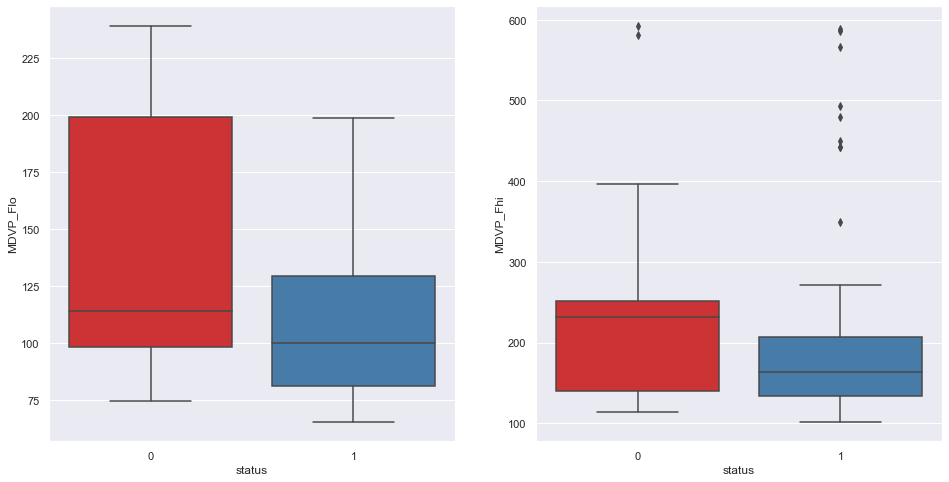

In [19]:
fig, ax = plt.subplots(1,2,figsize=(16,8))
sns.boxplot(x='status',y='MDVP_Flo',data=pd_data,palette="Set1",ax=ax[0])
sns.boxplot(x='status',y='MDVP_Fhi',data=pd_data,palette="Set1",ax=ax[1])

In [20]:
print('Insights: From the above boxplots we can see that the median minimum vocal fundamental frequency is around 125 Hz for patients without Parkinsons, whereas it is 100 Hz for patients diagnosed with Parkinsons.This means that the minimal vocal frequency is reduced for patients with Parkinsons.Similarly, for maximal vocal frequency also, the median for those without parkinsons is at around 240Hz whereas it is at around 160 Hz for those with Parkinsons. Thus we can conclude that maximal vocal frequency and minimal vocal frequency is reduced if one is diagnosed with Parkinsons. ')

Insights: From the above boxplots we can see that the median minimum vocal fundamental frequency is around 125 Hz for patients without Parkinsons, whereas it is 100 Hz for patients diagnosed with Parkinsons.This means that the minimal vocal frequency is reduced for patients with Parkinsons.Similarly, for maximal vocal frequency also, the median for those without parkinsons is at around 240Hz whereas it is at around 160 Hz for those with Parkinsons. Thus we can conclude that maximal vocal frequency and minimal vocal frequency is reduced if one is diagnosed with Parkinsons. 


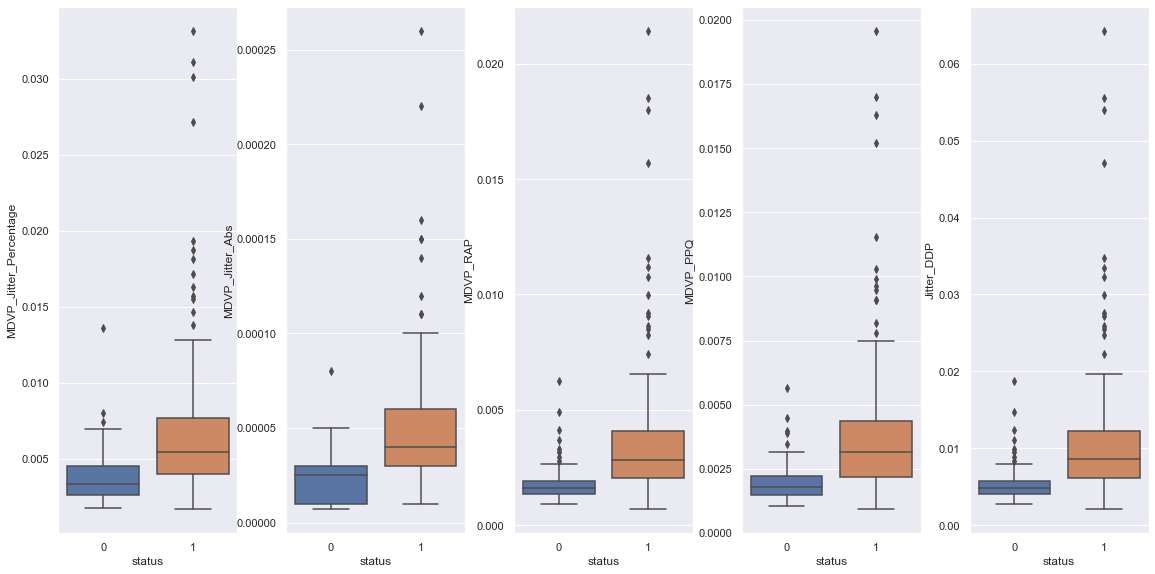

In [21]:
#Comparision between MDVP_Jitter_Percentage,MDVP_Jitter_Abs,MDVP_RAP,MDVP_PPQ,Jitter_DDP and status
cols = ["MDVP_Jitter_Percentage","MDVP_Jitter_Abs","MDVP_RAP","MDVP_PPQ","Jitter_DDP"]
fig, axs = plt.subplots(ncols = 5,figsize=(16,8))
fig.tight_layout()
for i in range(0,len(cols)):
    sns.boxplot(x='status',y=cols[i],data=pd_data, ax = axs[i])

In [22]:
print('Insights: From the boxplots we can see that for patients diagnosed with Parkinsons, MDVP_Jitter_Percentage,MDVP_Jitter_Abs,MDVP_RAP,MDVP_PPQ,Jitter_DDP values are higher than those not diagnosed with the disease.')

Insights: From the boxplots we can see that for patients diagnosed with Parkinsons, MDVP_Jitter_Percentage,MDVP_Jitter_Abs,MDVP_RAP,MDVP_PPQ,Jitter_DDP values are higher than those not diagnosed with the disease.


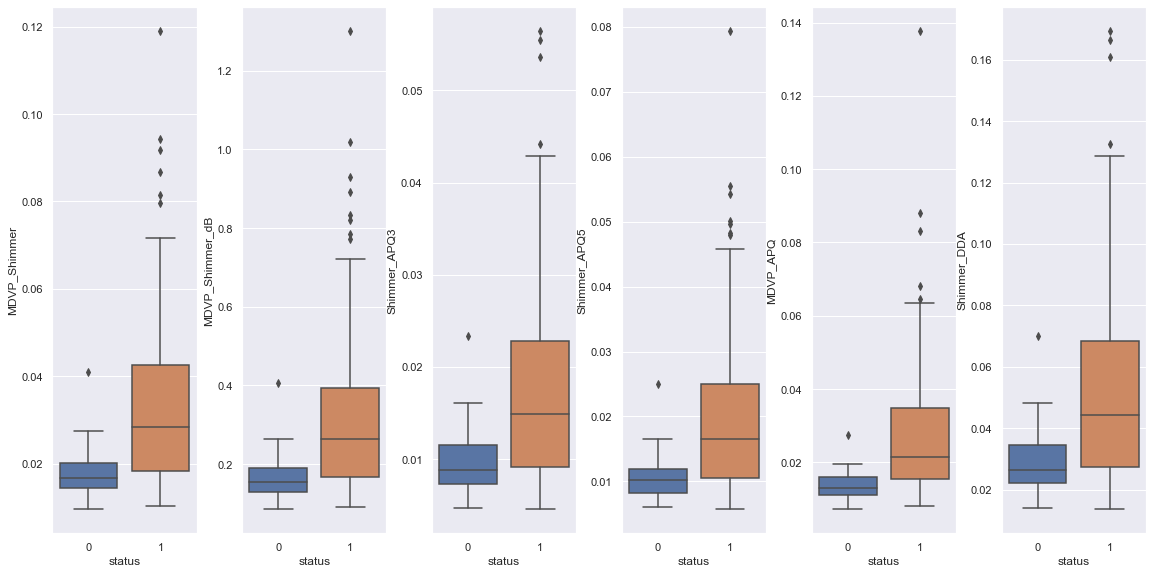

In [23]:
#Comparision between MDVP_Shimmer,MDVP_Shimmer_dB,Shimmer_APQ3,Shimmer_APQ5,MDVP_APQ,Shimmer_DDA and status
cols = ["MDVP_Shimmer","MDVP_Shimmer_dB","Shimmer_APQ3","Shimmer_APQ5","MDVP_APQ","Shimmer_DDA"]
fig, axs = plt.subplots(ncols = 6,figsize=(16,8))
fig.tight_layout()
for i in range(0,len(cols)):
    sns.boxplot(x='status',y=cols[i],data=pd_data, ax = axs[i])

In [24]:
print('Insights: From the boxplots we can see that for patients diagnosed with Parkinsons, MDVP_Shimmer,MDVP_Shimmer_dB,Shimmer_APQ3,Shimmer_APQ5,MDVP_APQ,Shimmer_DDA values are higher than those not diagnosed with the disease.')

Insights: From the boxplots we can see that for patients diagnosed with Parkinsons, MDVP_Shimmer,MDVP_Shimmer_dB,Shimmer_APQ3,Shimmer_APQ5,MDVP_APQ,Shimmer_DDA values are higher than those not diagnosed with the disease.


##### Checking the correlation between the columns

In [25]:
pd_data.corr()

,MDVP_Fo,MDVP_Fhi,MDVP_Flo,MDVP_Jitter_Percentage,MDVP_Jitter_Abs,MDVP_RAP,MDVP_PPQ,Jitter_DDP,MDVP_Shimmer,MDVP_Shimmer_dB,...,Shimmer_DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
MDVP_Fo,1.000000,0.400985,0.596546,-0.118003,-0.382027,-0.076194,-0.112165,-0.076213,-0.098374,-0.073742,...,-0.094732,-0.021981,0.059144,-0.383535,-0.383894,-0.446013,-0.413738,-0.249450,0.177980,-0.372356
MDVP_Fhi,0.400985,1.000000,0.084951,0.102086,-0.029198,0.097177,0.091126,0.097150,0.002281,0.043465,...,-0.003733,0.163766,-0.024893,-0.166136,-0.112404,-0.343097,-0.076658,-0.002954,0.176323,-0.069543
MDVP_Flo,0.596546,0.084951,1.000000,-0.139919,-0.277815,-0.100519,-0.095828,-0.100488,-0.144543,-0.119089,...,-0.150737,-0.108670,0.210851,-0.380200,-0.400143,-0.050406,-0.394857,-0.243829,-0.100629,-0.340071
MDVP_Jitter_Percentage,-0.118003,0.102086,-0.139919,1.000000,0.935714,0.990276,0.974256,0.990276,0.769063,0.804289,...,0.746635,0.906959,-0.728165,0.278220,0.360673,0.098572,0.693577,0.385123,0.433434,0.721543
MDVP_Jitter_Abs,-0.382027,-0.029198,-0.277815,0.935714,1.000000,0.922911,0.897778,0.922913,0.703322,0.716601,...,0.697170,0.834972,-0.656810,0.338653,0.441839,0.175036,0.735779,0.388543,0.310694,0.748162
MDVP_RAP,-0.076194,0.097177,-0.100519,0.990276,0.922911,1.000000,0.957317,1.000000,0.759581,0.790652,...,0.744919,0.919521,-0.721543,0.266668,0.342140,0.064083,0.648328,0.324407,0.426605,0.670999
MDVP_PPQ,-0.112165,0.091126,-0.095828,0.974256,0.897778,0.957317,1.000000,0.957319,0.797826,0.839239,...,0.763592,0.844604,-0.731510,0.288698,0.333274,0.196301,0.716489,0.407605,0.412524,0.769647
Jitter_DDP,-0.076213,0.097150,-0.100488,0.990276,0.922913,1.000000,0.957319,1.000000,0.759555,0.790621,...,0.744901,0.919548,-0.721494,0.266646,0.342079,0.064026,0.648328,0.324377,0.426556,0.671005
MDVP_Shimmer,-0.098374,0.002281,-0.144543,0.769063,0.703322,0.759581,0.797826,0.759555,1.000000,0.987258,...,0.987626,0.722194,-0.835271,0.367430,0.447424,0.159954,0.654734,0.452025,0.507088,0.693771
MDVP_Shimmer_dB,-0.073742,0.043465,-0.119089,0.804289,0.716601,0.790652,0.839239,0.790621,0.987258,1.000000,...,0.963202,0.744477,-0.827805,0.350697,0.410684,0.165157,0.652547,0.454314,0.512233,0.695058


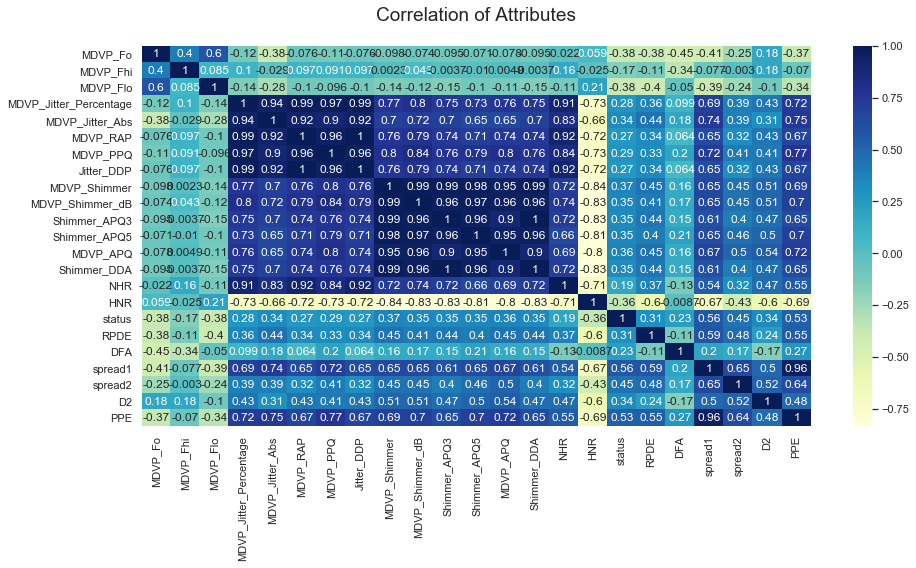

In [26]:
#drawing a heatmap to check the correlation between columns
plt.figure(figsize = (15,7))
plt.title('Correlation of Attributes', y=1.05, size=19)
sns.heatmap(pd_data.corr(),cmap="YlGnBu",annot=True)

##### Insights on correlation:

1. MDVP_Jitter_Percentage,MDVP_Jitter_Abs,MDVP_RAP,MDVP_PPQ,Jitter_DDP are highly correlated.
2. MDVP_Shimmer,MDVP_Shimmer_dB,Shimmer_APQ3,Shimmer_APQ5,MDVP_APQ,Shimmer_DDA are highly correlated.
3. The target variable status has a good positive correlation with Spread1,PPE and Spread2 exactly in the same order and has the most negative correlation with D2, NHR and MDVP_Flo.

### 4. Split the dataset into training and test set in the ratio of 70:30 (Training:Test) (5 points) 

In [27]:
#We are splitting the data to seperate out the independent attributes and store them in X. Store the target variable in Y.
X = pd_data.drop(['status'], axis = 1)
y = pd_data['status']

In [28]:
# Function to print the different metrics such as confusion matrix, roc, accuracy, precision, recall etc

def printModel(model, X_train, X_test, y_train, y_test):
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    print('Train set accuracy = ', metrics.accuracy_score(y_train, y_train_pred))
    print('Test set accuracy = ', metrics.accuracy_score(y_test, y_test_pred))
    print(metrics.classification_report(y_test, y_test_pred))

    cm = metrics.confusion_matrix(y_test, y_test_pred)
    cm = pd.DataFrame(cm, columns=['Predicted Negative PD', 'Predicted Positive PD'], index=['Truth Negative PD', 'Truth Positive PD'])
    sns.heatmap(cm, annot=True, fmt='g', cbar=False)
    plt.show()

    y_test_proba = model.predict_proba(X_test)
    y_test_proba = y_test_proba[:,1]
    # generate a no skill prediction (majority class)
    ns_probs = [0 for _ in range(len(y_test))]
    # calculate scores
    ns_auc = metrics.roc_auc_score(y_test, ns_probs)
    lr_auc = metrics.roc_auc_score(y_test, y_test_proba)
    # summarize scores
    print('ROC AUC=%.3f' % (lr_auc))
    
    # calculate roc curves
    ns_fpr, ns_tpr, _ = metrics.roc_curve(y_test, ns_probs)
    lr_fpr, lr_tpr, _ = metrics.roc_curve(y_test, y_test_proba)
    # plot the roc curve for the model
    plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
    plt.plot(lr_fpr, lr_tpr, marker='.', label='Model Skill')
    
    # axis labels
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    # show the legend
    plt.legend()
    # show the plot
    plt.show()

In [29]:
# Create the training and test data set in the ratio of 70:30 respectively.
# Prepare data for logistic regression

features=X.iloc[:, 0:10]
features_array = features.values   #logistic modeling algorithm requires feature array not dataframe
target_labels = y.values


test_size = 0.30 
seed = 7  # Random numbmer seeding for reapeatability of the code when using random functions to 
# generate the training and test data

X_train, X_test, y_train, y_test = train_test_split(features_array, target_labels, test_size=test_size, random_state=seed)
y_train = np.ravel(y_train)   # to convert 1 d vector into 1 d array

### 5. Prepare the data for training - Scale the data if necessary, get rid of missing values (if any) etc

We have already tested for missing values earlier in the complete dataset and did not find any. Hence we will move ahead with the models.

### 6. Train at least 3 standard classification algorithms - Logistic Regression, Naive Bayes’, SVM, k-NN etc, and note down their accuracies on the test data

##### Logistic Regression

Train set accuracy =  0.8014705882352942
Test set accuracy =  0.8135593220338984
              precision    recall  f1-score   support

           0       0.57      0.33      0.42        12
           1       0.85      0.94      0.89        47

    accuracy                           0.81        59
   macro avg       0.71      0.63      0.65        59
weighted avg       0.79      0.81      0.79        59



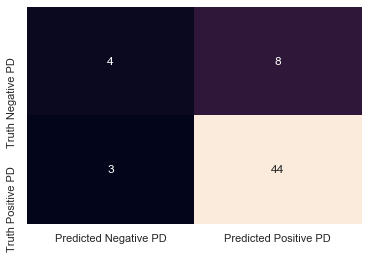

ROC AUC=0.773


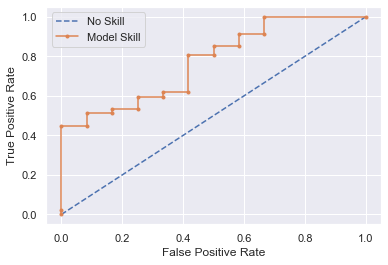

In [30]:
# We will first try Logistic Regression.
model = LogisticRegression()
model.fit(X_train, y_train)
model_score = model.score(X_test, y_test)
printModel(model, X_train, X_test, y_train, y_test)

##### Insights:

The score of 81% looks good. The precision and recall of class 1 is quite high and in the acceptable range of over 80%. From the confusion matrix we can see that the number of patients predicted correctly for Parkinsons disease was 48 and there were 11 patients predicted incorrectly.

##### Naive Bayes Model

In [31]:
#Let us now try the Naive Bayes Model.
# Create the training and test data set in the ratio of 70:30 respectively.
# Prepare data for Naive Bayes Model
features=X.iloc[:, 0:10]

target_labels = pd_data.loc[:, pd_data.columns == 'status']


X_array = features.values
y_array = target_labels.values


test_size = 0.30 # taking 70:30 training and test set
seed = 7  # Random numbmer seeding for reapeatability of the code

X_train, X_test, y_train, y_test = train_test_split(X_array, y_array, test_size=test_size, random_state=seed)
y_train = np.ravel(y_train)   # to convert 1 d vector into 1 d array

Train set accuracy =  0.6764705882352942
Test set accuracy =  0.6440677966101694
              precision    recall  f1-score   support

           0       0.34      0.83      0.49        12
           1       0.93      0.60      0.73        47

    accuracy                           0.64        59
   macro avg       0.64      0.71      0.61        59
weighted avg       0.81      0.64      0.68        59



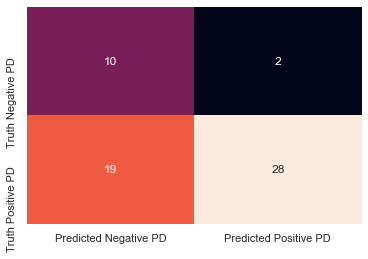

ROC AUC=0.785


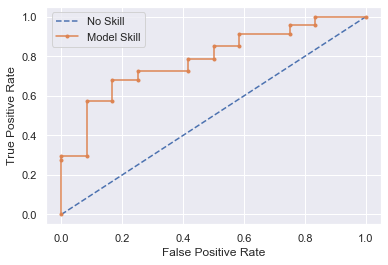

In [32]:
# Invoking the NB Gaussian function to create the model
# fitting the model in the training data set
model = GaussianNB()
model.fit(X_train, y_train)
model_score = model.score(X_test, y_test)
printModel(model, X_train, X_test, y_train, y_test)

##### Insights:

The score of 64% is not that great. The precision is in acceptable range but the recall is quite low. From the confusion matrix we can see that the number of patients predicted correctly for Parkinsons disease was 38 and there were 21 patients predicted incorrectly. This means that the Gaussian Naive Bayes Model did not perform well at all, when compared to the Logistic Regression model.

##### K Nearest Neighbor model

In [33]:
#We will now try using the K-nearest neighbor model.
from sklearn.neighbors import KNeighborsClassifier
NNH = KNeighborsClassifier(n_neighbors= 3 , weights = 'distance')
NNH.fit(X_train, y_train)
#printModel(model, X_train, X_test, y_train, y_test)
predicted_labels = NNH.predict(X_test)
print(metrics.confusion_matrix(y_test, predicted_labels))

[[ 6  6]
 [ 4 43]]


In [34]:
NNH_score = NNH.score(X_test, y_test)
print(NNH_score)

0.8305084745762712


##### Insights:

In [35]:
# summarize the fit of the model
print(metrics.classification_report(y_test, predicted_labels))

              precision    recall  f1-score   support

           0       0.60      0.50      0.55        12
           1       0.88      0.91      0.90        47

    accuracy                           0.83        59
   macro avg       0.74      0.71      0.72        59
weighted avg       0.82      0.83      0.82        59



The score of 83% is the best among all the 3 models tested so far. The precision and recall are in acceptable range. From the confusion matrix we can see that the number of patients predicted correctly for Parkinsons disease was 49 and there were only 10 patients predicted incorrectly. This means that the K Nearest neighbor Model performed the best, when compared to the 3 models.

In [36]:
### let us check the effect of scaling (convert all dimensions to z scores)
from sklearn import preprocessing
X_train_scaled = preprocessing.scale(X_train)
X_test_scaled = preprocessing.scale(X_test)
NNH.fit(X_train_scaled, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='distance')

In [37]:
predicted_labels = NNH.predict(X_test_scaled)
print(metrics.confusion_matrix(y_test, predicted_labels))

[[ 9  3]
 [ 3 44]]


In [38]:
NNH_scaled_score = NNH.score(X_test_scaled, y_test)
print(NNH_scaled_score)

0.8983050847457628


In [39]:
# summarize the fit of the model
print(metrics.classification_report(y_test, predicted_labels))

              precision    recall  f1-score   support

           0       0.75      0.75      0.75        12
           1       0.94      0.94      0.94        47

    accuracy                           0.90        59
   macro avg       0.84      0.84      0.84        59
weighted avg       0.90      0.90      0.90        59



##### Insights:

After scaling, we can see that the K Nearest neighbour model gives even better results. The score is now 89%, which is the best among all the models tested so far. The precision and recall scores are also very good, at a value of 0.94. Thus we can clearly conclude that the K Nearest neighbour model, when scaled, gives the best results among all the models applied so far.

### 7. Train a meta-classifier and note the accuracy on test data (10 points)

In [ ]:
pip install mlxtend

In [46]:
from mlxtend.classifier import StackingClassifier

In [52]:
clf1 = KNeighborsClassifier(n_neighbors=3)
clf2 = LogisticRegression() # RandomForestClassifier(random_state=1)
clf3 = GaussianNB()
clf4 = RandomForestClassifier(random_state=1)

In [53]:
rf = RandomForestClassifier(random_state=1) # LogisticRegression()

In [54]:
sclf = StackingClassifier(classifiers=[clf1, clf2, clf3, clf4], meta_classifier = rf)

In [55]:
print('3-fold cross validation:\n')

3-fold cross validation:



In [57]:
for clf, label in zip([clf1, clf2, clf3, clf4, sclf], ['KNN', 'LR', 'Naive Bayes', 'RF',
                                                 'StackingClassifier']):
    scores = model_selection.cross_val_score(clf, x, y, cv=10, scoring='accuracy')
    print("Accuracy: %0.2f (+/- %0.2f) [%s]"  % (scores.mean(), scores.std(), label))

ValueError: Found input variables with inconsistent numbers of samples: [150, 195]

##### Using probabilities in stacking

In [58]:
clf1 = KNeighborsClassifier(n_neighbors=1)
clf2 = RandomForestClassifier(random_state=1)
clf3 = GaussianNB()

In [59]:
lr = LogisticRegression()

In [60]:
sclf = StackingClassifier(classifiers=[clf1, clf2, clf3],
                          use_probas=True,
                          average_probas=False,
                          meta_classifier=lr)

In [61]:
print('3-fold cross validation:\n')

3-fold cross validation:



In [62]:
for clf, label in zip([clf1, clf2, clf3, sclf], 
                      ['KNN', 
                       'Random Forest', 
                       'Naive Bayes',
                       'StackingClassifier']):

    scores = model_selection.cross_val_score(clf, x, y, 
                                              cv=3, scoring='accuracy')
    print("Accuracy: %0.2f (+/- %0.2f) [%s]" 
          % (scores.mean(), scores.std(), label))

ValueError: Found input variables with inconsistent numbers of samples: [150, 195]

##### Insights:

Using stacking we see that Random Forest classifier provides the best accuracy.

### 8. Let us train at least one standard Ensemble model - Random forest, Bagging, Boosting etc, and note the accuracy

##### Random Forest Classifier

In [63]:
#Let us now try the Naive Bayes Model.
# Create the training and test data set in the ratio of 70:30 respectively.
# Prepare data for Naive Bayes Model
features=X.iloc[:, 0:10]

target_labels = pd_data.loc[:, pd_data.columns == 'status']


X_array = features.values
y_array = target_labels.values


test_size = 0.30 # taking 70:30 training and test set
seed = 7  # Random numbmer seeding for reapeatability of the code

X_train, X_test, y_train, y_test = train_test_split(X_array, y_array, test_size=test_size, random_state=seed)
y_train = np.ravel(y_train)   # to convert 1 d vector into 1 d array

In [64]:
#We will use the Random Forest classifier on our data now
from sklearn.ensemble import RandomForestClassifier
rfcl = RandomForestClassifier(n_estimators = 50)
rfcl = rfcl.fit(X_train, y_train)
y_pred = rfcl.predict(X_test)
rfcl.score(X_test , y_test)

0.8983050847457628

##### Insights:

Using random forest, we see that the score is 89%, which is similar to what we had found while implementing K Nearest Neighbour scaled model.

##### Decision Tree

In [67]:
dt_model = DecisionTreeClassifier(criterion='entropy',max_depth=6,random_state=100,min_samples_leaf=5)
dt_model.fit(X_train, y_train)
dt_model.score(X_test , y_test) 

0.847457627118644

Decision tree provides with 84% score, which is not as good as KNN scaled.

##### Bagging

In [68]:
#we will also try bagging
from sklearn.ensemble import BaggingClassifier
bgcl = BaggingClassifier(base_estimator=dt_model, n_estimators=50, max_samples=.7)
bgcl = bgcl.fit(X_train, y_train)
y_pred = bgcl.predict(X_test)
bgcl.score(X_test , y_test)

0.8983050847457628

Score is 89.83%

### 9. Compare all the models (minimum 5) and pick the best one among them

Thus we see that we can use either KNN Scaled or Bagging as the best model.